In [6]:
import numpy as np
import Plot as plot
import math
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
import time
import datetime
import pickle
import os
import scipy.spatial
from scipy.spatial import distance
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib as plt
import logging
from scipy import signal
import learningAlgs as classImportLA
import dataManipulation as dataMan
from itertools import permutations
import importlib
from datetime import timedelta
from multiprocessing import Pool
import multiprocessing
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cluster import KMeans
import timeIntervalPlotter as intervalPlotter
import pysal
import warnings
import lumping_traditional as oldLumping
import boundaryFull_SS_WeightedLumping as WLumping
from importlib import reload
from scipy.stats import rayleigh
import dataManipulation as dataMan
import matplotlib.pyplot as plt
import processData as processData
import tensorflow as tf
# import tensorflow_probability as tfp
from random import shuffle
from pandas import concat
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
warnings.filterwarnings('always')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [18]:
data = pd.read_pickle("main_dataFrame")

In [19]:
data.head()

,col1,time,CU,CU/255,timeIndex,weekDay,day,corr1,corr2,corr3,corr4,corr5,month
0,0,2018-11-12 19:01:32,45,0.176471,38,0,0,0.499839,0.529556,0.744314,0.633685,0.509328,11
1,1,2018-11-12 19:01:38,45,0.176471,38,0,0,0.499839,0.529556,0.744314,0.633685,0.509328,11
2,2,2018-11-12 19:01:44,51,0.200000,38,0,0,0.499839,0.529556,0.744314,0.633685,0.509328,11
3,3,2018-11-12 19:01:50,53,0.207843,38,0,0,0.499839,0.529556,0.744314,0.633685,0.509328,11
4,4,2018-11-12 19:01:56,45,0.176471,38,0,0,0.499839,0.529556,0.744314,0.633685,0.509328,11


,index,col1,time,CU,CU/255,timeIndex,weekDay,day,corr1,corr2,corr3,corr4,corr5,month
0,11830,11830,2018-11-13 16:00:02,63,0.247059,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11
1,11831,11831,2018-11-13 16:00:08,68,0.266667,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11
2,11832,11832,2018-11-13 16:00:14,58,0.227451,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11
3,11833,11833,2018-11-13 16:00:20,68,0.266667,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11
4,11834,11834,2018-11-13 16:00:26,104,0.407843,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11


,index,col1,time,CU,CU/255,timeIndex,weekDay,day,corr1,corr2,corr3,corr4,corr5,month
0,2785,2785,2018-11-13 00:00:02,43,0.168627,0,1,1,0.486663,0.508453,0.607833,0.426311,0.519979,11
1,2786,2786,2018-11-13 00:00:08,43,0.168627,0,1,1,0.486663,0.508453,0.607833,0.426311,0.519979,11
2,2787,2787,2018-11-13 00:00:14,45,0.176471,0,1,1,0.486663,0.508453,0.607833,0.426311,0.519979,11
3,2788,2788,2018-11-13 00:00:20,40,0.156863,0,1,1,0.486663,0.508453,0.607833,0.426311,0.519979,11
4,2789,2789,2018-11-13 00:00:26,56,0.219608,0,1,1,0.486663,0.508453,0.607833,0.426311,0.519979,11


In [15]:
y = [i for i in range(len(dataTimeIndex))]
offline.plot([{
    'x': dataTimeIndex.index,
    'y': dataTimeIndex["CU"],
    'name': col
}  for col in dataTimeIndex.columns], filename='normalPlutting')

/home/sepehr/.local/lib/python3.6/site-packages/plotly/offline/offline.py:526: UserWarning:

Your filename `normalPlutting` didn't end with .html. Adding .html to the end of your file.



'normalPlutting.html'

In [22]:
timeIndexVal = 0
dataTimeIndex = data.loc[(data["day"] == 1)]
dataTimeIndex.reset_index(inplace = True) 
dataTimeIndex["log"] = np.log(dataTimeIndex["CU"])
dataTimeIndex = dataTimeIndex.loc[dataTimeIndex["log"] != np.inf]
dataTimeIndex = dataTimeIndex.loc[dataTimeIndex["log"] != -np.inf]
dataTimeIndex = dataTimeIndex.dropna()
dataTimeIndex["logDiff"] = dataTimeIndex["log"].diff()
dataTimeIndex = dataTimeIndex.loc[dataTimeIndex["logDiff"] != np.inf]
dataTimeIndex = dataTimeIndex.loc[dataTimeIndex["logDiff"] != -np.inf]
dataTimeIndex = dataTimeIndex.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



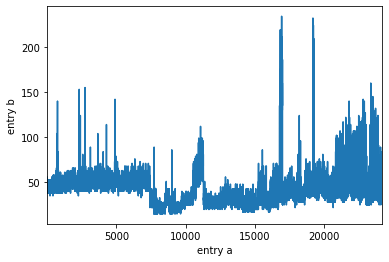

In [12]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
dataTimeIndex["CU"].plot()
plt.xlabel('entry a')
plt.ylabel('entry b')
pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



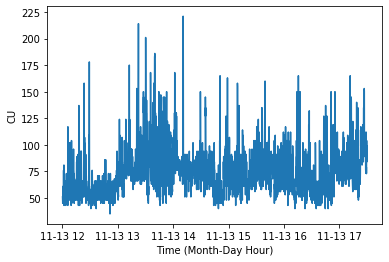

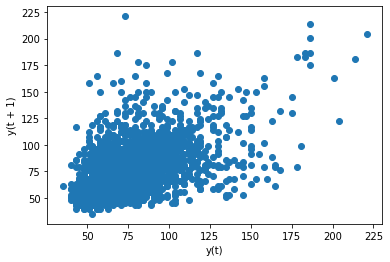

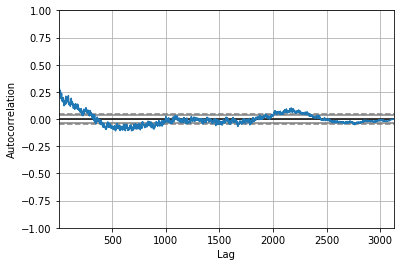

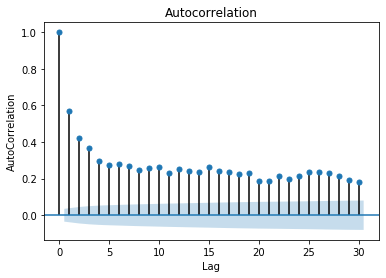

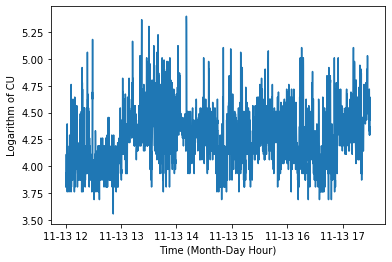

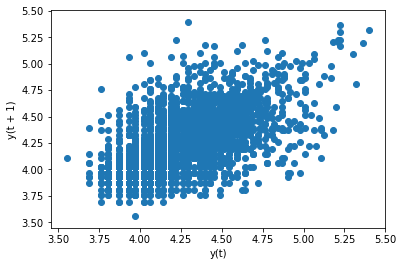

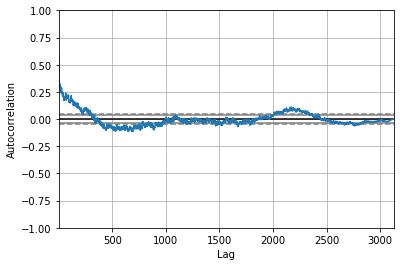

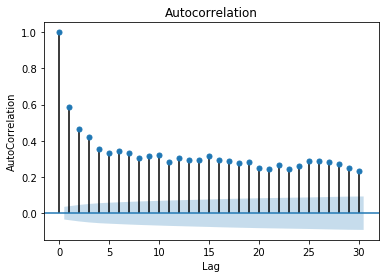

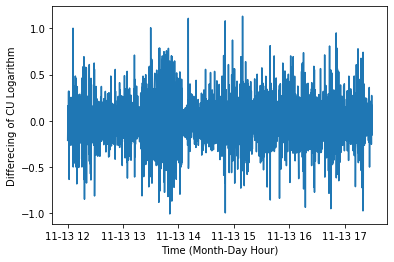

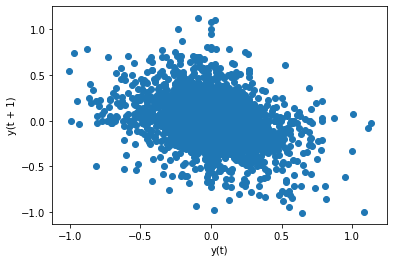

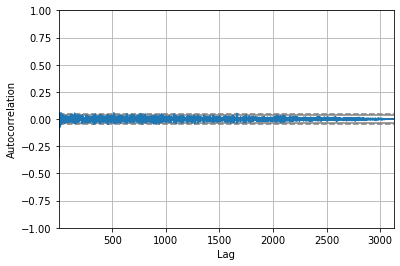

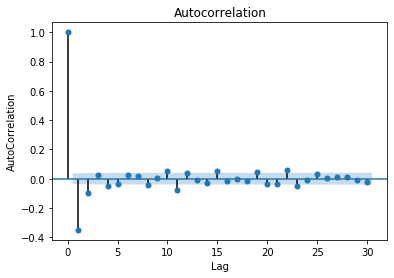

In [35]:
from matplotlib import pyplot
from pandas.plotting import lag_plot

timeIndexVal = 0
dataTimeIndex = data.loc[(data["day"] == 1) & ((data["timeIndex"] >= 24) & (data["timeIndex"] <= 34))]
dataTimeIndex.reset_index(inplace = True) 
dataTimeIndex["log"] = np.log(dataTimeIndex["CU"])
dataTimeIndex = dataTimeIndex.loc[dataTimeIndex["log"] != np.inf]
dataTimeIndex = dataTimeIndex.loc[dataTimeIndex["log"] != -np.inf]
dataTimeIndex = dataTimeIndex.dropna()
dataTimeIndex["logDiff"] = dataTimeIndex["log"].diff()
dataTimeIndex = dataTimeIndex.loc[dataTimeIndex["logDiff"] != np.inf]
dataTimeIndex = dataTimeIndex.loc[dataTimeIndex["logDiff"] != -np.inf]
dataTimeIndex = dataTimeIndex.dropna()
x = dataTimeIndex.copy()

timeIndexVal = str(timeIndexVal)
plt.plot(dataTimeIndex["time"], dataTimeIndex["CU"])
plt.xlabel('Time (Month-Day Hour)')
plt.ylabel('CU')
pyplot.savefig("data_day1_12-5P.svg", format="svg")
# pyplot.savefig("data_data_day1_12-5A.png", format="png")
pyplot.savefig("data_day1_12-5P.pdf", format="pdf")
pyplot.show()


lag_plot(dataTimeIndex["CU"])
pyplot.savefig("data_day1_12-5P_autoCorr.svg", format="svg")
# pyplot.savefig("data_data_day1_12-5A_autoCorr.png", format="png")
pyplot.savefig("data_day1_12-5P_autoCorr.pdf", format="pdf")
pyplot.show()


autocorrelation_plot(dataTimeIndex["CU"])
pyplot.savefig("data_day1_12-5P_autoCorr_with_all_lags.svg", format="svg")
# pyplot.savefig("data_day1_12-5A_autoCorr_with_all_lags.png", format="png")
pyplot.savefig("data_day1_12-5P_autoCorr_with_all_lags.pdf", format="pdf")
pyplot.show()


plot_acf(dataTimeIndex["CU"], lags=30)
plt.xlabel('Lag')
plt.ylabel('AutoCorrelation')
pyplot.savefig("data_day1_12-5P_autoCorr_with_30lags.svg", format="svg")
# pyplot.savefig("data_day1_12-5A_autoCorr_with_30lags.png", format="png")
pyplot.savefig("data_day1_12-5P_autoCorr_with_30lags.pdf", format="pdf")
pyplot.show()




plt.plot(x["time"], x["log"])
plt.xlabel('Time (Month-Day Hour)')
plt.ylabel('Logarithm of CU')
pyplot.savefig("log_data_day1_12-5P.svg", format="svg")
# pyplot.savefig("log_data_day1_12-5A.png", format="png")
pyplot.savefig("log_data_day1_12-5P.pdf", format="pdf")
pyplot.show()


lag_plot(x["log"])
pyplot.savefig("log_data_day1_12-5P_autoCorr.svg", format="svg")
# pyplot.savefig("log_data_day1_12-5A_autoCorr.png", format="png")
pyplot.savefig("log_data_day1_12-5P_autoCorr.pdf", format="pdf")
pyplot.show()


autocorrelation_plot(x["log"])
pyplot.savefig("log_data_day1_12-5P_autoCorr_with_all_lags.svg", format="svg")
# pyplot.savefig("log_" + timeIndexVal + "_autoCorr_with_all_lags.png", format="png")
pyplot.savefig("log_data_day1_12-5P_autoCorr_with_all_lags.pdf", format="pdf")
pyplot.show()


plot_acf(x["log"], lags=30)
plt.xlabel('Lag')
plt.ylabel('AutoCorrelation')
pyplot.savefig("log_data_day1_12-5P_autoCorr_with_30lags.svg", format="svg")
# pyplot.savefig("log_" + timeIndexVal + "_autoCorr_with_30_lags.png", format="png")
pyplot.savefig("log_data_day1_12-5P_autoCorr_with_30lags.pdf", format="pdf")
pyplot.show()






plt.plot(x["time"], x["logDiff"])
plt.xlabel('Time (Month-Day Hour)')
plt.ylabel('Differecing of CU Logarithm')
pyplot.savefig("logDiff_data_day1_12-5P.svg", format="svg")
# pyplot.savefig("logDiff_" + timeIndexVal + ".png", format="png")
pyplot.savefig("logDiff_data_day1_12-5P.pdf", format="pdf")
pyplot.show()


lag_plot(x["logDiff"])
pyplot.savefig("logDiff_data_day1_12-5P_autoCorr.svg", format="svg")
# pyplot.savefig("logDiff_data_day1_12-5A_autoCorr.png", format="png")
pyplot.savefig("logDiff_data_day1_12-5P_autoCorr.pdf", format="pdf")
pyplot.show()


autocorrelation_plot(x["logDiff"])
pyplot.savefig("logDiff_data_day1_12-5P_autoCorr_with_all_lags.svg", format="svg")
# pyplot.savefig("logDiff_data_day1_12-5A_autoCorr_with_all_lags.png", format="png")
pyplot.savefig("logDiff_data_day1_12-5P_autoCorr_with_all_lags.pdf", format="pdf")
pyplot.show()


plot_acf(x["logDiff"], lags=30)
plt.xlabel('Lag')
plt.ylabel('AutoCorrelation')
pyplot.savefig("logDiff_data_day1_12-5P_autoCorr_with_30lags.svg", format="svg")
# pyplot.savefig("logDiff_data_day1_12-5A_autoCorr_with_30lags.png", format="png")
pyplot.savefig("logDiff_data_day1_12-5P_autoCorr_with_30lags.pdf", format="pdf")
pyplot.show()


In [149]:
x = x.loc[x["logDiff"] != np.inf]
x = x.loc[x["logDiff"] != -np.inf]
# x = x.loc[x["logDiff"] != np.NaN]
x = x.dropna()
x.head()

,index,col1,time,CU,CU/255,timeIndex,weekDay,day,corr1,corr2,corr3,corr4,corr5,month,log,logDiff
1,11831,11831,2018-11-13 16:00:08,68,0.266667,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11,4.219508,0.076373
2,11832,11832,2018-11-13 16:00:14,58,0.227451,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11,4.060443,-0.159065
3,11833,11833,2018-11-13 16:00:20,68,0.266667,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11,4.219508,0.159065
4,11834,11834,2018-11-13 16:00:26,104,0.407843,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11,4.644391,0.424883
5,11835,11835,2018-11-13 16:00:32,91,0.356863,32,1,1,0.237806,0.261782,0.701682,0.865597,0.403108,11,4.510860,-0.133531


In [142]:

values = DataFrame(x["CU"])
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000 -0.45932
t+1 -0.45932  1.00000


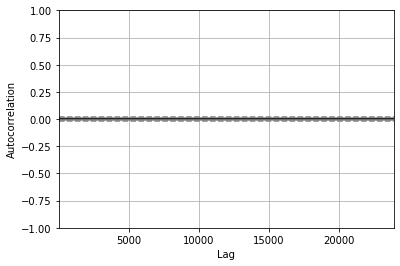

In [116]:
autocorrelation_plot(x["logDiff"])
pyplot.show()

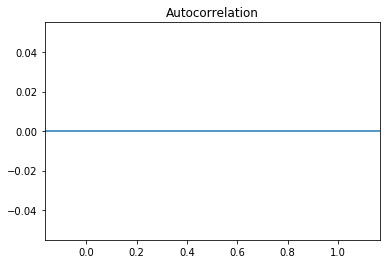

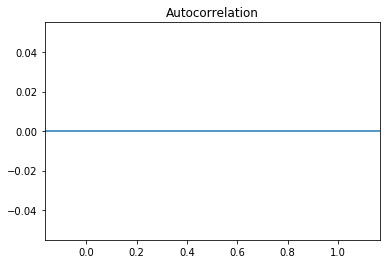

In [118]:
plot_acf(x["logDiff"], lags=100)

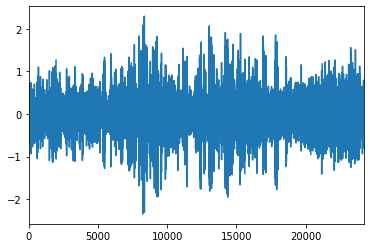

In [125]:
# dataTimeIndex["log"] = np.log(dataTimeIndex["CU"])
dataTimeIndex["logDiff"].plot()
pyplot.show()

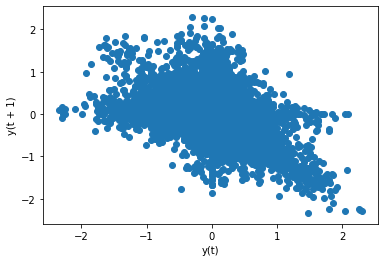

In [52]:
lag_plot(dataTimeIndex["logDiff"])
pyplot.show()

In [113]:
# x = dataTimeIndex
np.min(x["logDiff"])
# dataTimeIndex.iloc[a]

-2.34660197841082

In [112]:
x = x.loc[x["logDiff"] != -np.inf]

In [106]:
x.head()

,index,col1,time,CU,CU/255,timeIndex,weekDay,day,corr1,corr2,corr3,corr4,corr5,month,log,logDiff
1947,120461,120461,2018-11-21 16:27:02,63,0.247059,32,2,9,0.070497,0.087203,0.427057,0.628106,0.220036,11,4.143135,inf
1960,120474,120474,2018-11-21 16:28:20,71,0.278431,32,2,9,0.070497,0.087203,0.427057,0.628106,0.220036,11,4.262680,inf
1973,120487,120487,2018-11-21 16:29:38,79,0.309804,32,2,9,0.070497,0.087203,0.427057,0.628106,0.220036,11,4.369448,inf
3844,240918,240918,2018-11-30 16:17:08,102,0.400000,32,4,18,0.084275,0.102873,0.470842,0.697261,0.245559,11,4.624973,inf
3853,240927,240927,2018-11-30 16:18:02,71,0.278431,32,4,18,0.084275,0.102873,0.470842,0.697261,0.245559,11,4.262680,inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [60]:
np.amax(x)

index                    1533725
col1                     1533725
time         2019-08-02 16:29:56
CU                           232
CU/255                  0.909804
timeIndex                     32
weekDay                        4
day                          260
corr1                   0.923816
corr2                   0.913313
corr3                   0.965692
corr4                   0.954266
corr5                    0.91641
month                         12
log                      5.44674
logDiff                      inf
dtype: object